### Analysis software development 

Goal: establish smooth reading of the binary DAQ datafiles

In [3]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
# import data handling class
from DT5550 import DT5550

Filename to process

In [31]:
#filename = '../daq/ReadoutClient/test.raw'
#filename = '../daq/ReadoutClient/na22_tmode0_1M.raw'
filename = '../daq/ReadoutClient/na22_tmode1_670k.raw'

Open a datafile and read the data

In [41]:
#
# open the datfile
#
print('Open datafile:',filename)
io = DT5550(file=filename)
#
# loop over the data
#
Q0 = []
Q1 = []
t0 = []
t1 = []
nvalid = []

nhit = np.zeros(8)
while(io.read_event() == 0):
    if io.n_event%10000 == 0:
        print('Processed ',io.n_event,' events')
    # here you can decide what to do with the event information
    # ......
    #for id in range(8):
    n=0
    for i in range(8):
#        print(i,io.Q[i],io.t[i],io.valid[i])

        if io.valid[i]:
            n = n+1
            nhit[i] = nhit[i]+1
    nvalid.append(n)
    
    if n == 3:
        if abs(io.Q[0]-3130)<170:
            for i in range(8):
                if i!=0:                    
                    t0.append(io.t[i])

print('Processing done')

Open datafile: ../daq/ReadoutClient/na22_tmode1_670k.raw
Processed  10000  events
Processed  20000  events
Processed  30000  events
Processed  40000  events
Processed  50000  events
Processed  60000  events
Processed  70000  events
Processed  80000  events
Processed  90000  events
Processed  100000  events
Processed  110000  events
Processed  120000  events
Processed  130000  events
Processed  140000  events
Processed  150000  events
Processed  160000  events
Processed  170000  events
Processed  180000  events
Processed  190000  events
Processed  200000  events
Processed  210000  events
Processed  220000  events
Processed  230000  events
Processed  240000  events
Processed  250000  events
Processed  260000  events
Processed  270000  events
Processed  280000  events
Processed  290000  events
Processed  300000  events
Processed  310000  events
Processed  320000  events
Processed  330000  events
Processed  340000  events
Processed  350000  events
Processed  360000  events
Processed  37000

Text(0, 0.5, '$Q_1$')

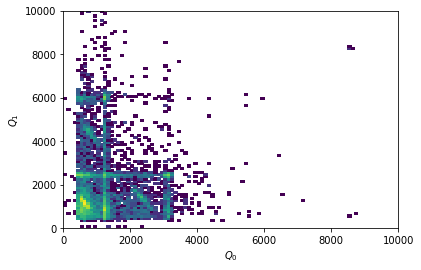

In [6]:
import matplotlib as mpl

h = plt.hist2d(Q0,Q1,bins=(100,100),range=((0,10000),(0,10000)),norm=mpl.colors.LogNorm())
plt.xlabel('$Q_0$')
plt.ylabel('$Q_1$')

(0.1, 2000000.0)

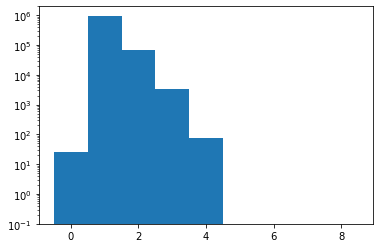

In [14]:
h = plt.hist(nvalid, bins=9, range=(-0.5,8.5))
plt.yscale('log')
plt.ylim((0.1,2e6))

(0.1, 10000.0)

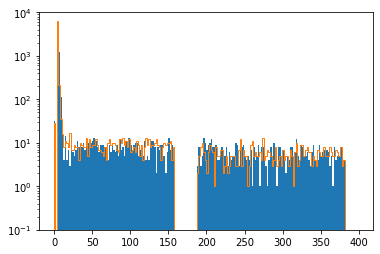

In [9]:
h = plt.hist(t0,bins=200,range=(-0.5,399.5),histtype='bar')
h = plt.hist(t1,bins=200,range=(-0.5,399.5),histtype='step')
plt.yscale('log')
plt.ylim([0.1,1e4])

A few basic plots: integrated charge and time

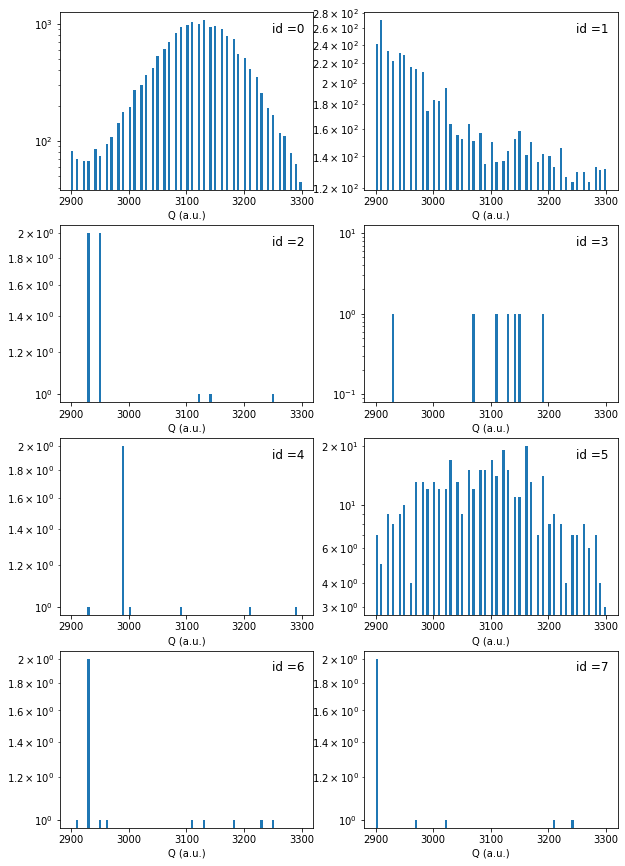

In [28]:
io.plot_all(type="charge",bins=100,logy=True, range=(2900,3300))

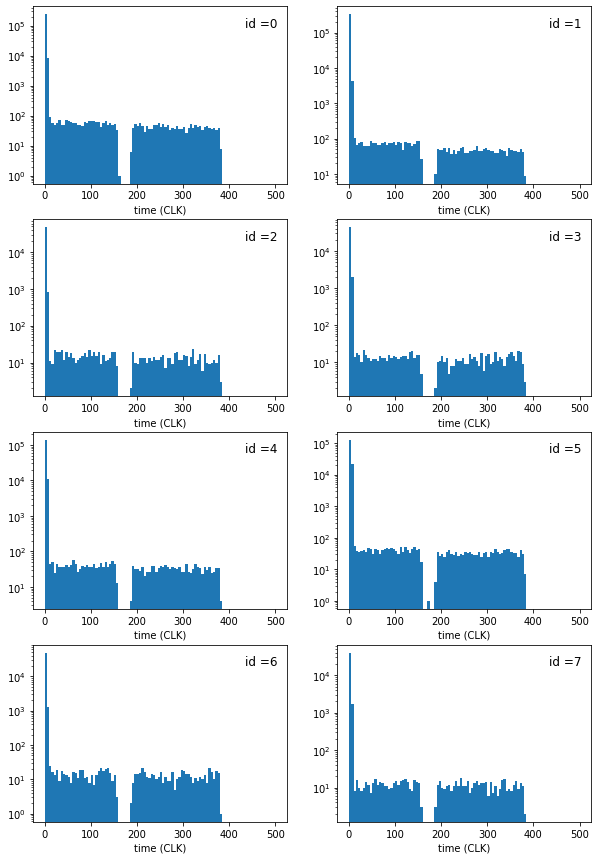

In [16]:
io.plot_all(type="time",range=(0,500),bins=100,logy=True)

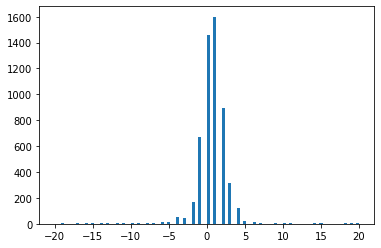

In [17]:
h=plt.hist((np.array(t0)-np.array(t1)),bins=100,range=(-20,20))


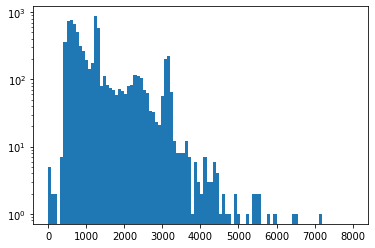

In [21]:
h=plt.hist(Q0,bins=100,range=(0,8000))
plt.yscale('log')

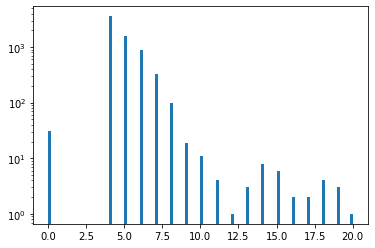

In [22]:
h=plt.hist(t0,bins=100,range=(0,20))
plt.yscale('log')

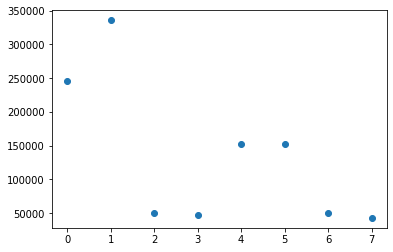

In [23]:
h = plt.plot(nhit,'o')

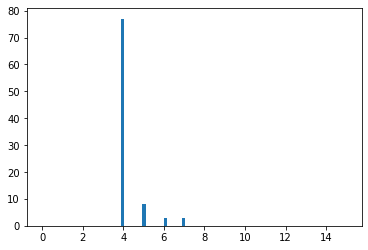

In [40]:
h = plt.hist(t0,bins=100,range=(0,15))